Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.2120
Iteration 200, Cost: 0.1651
Iteration 300, Cost: 0.1429
Iteration 400, Cost: 0.1289
Iteration 500, Cost: 0.1187
Iteration 600, Cost: 0.1110
Iteration 700, Cost: 0.1047
Iteration 800, Cost: 0.0995
Iteration 900, Cost: 0.0951
Iteration 1000, Cost: 0.0913
Iteration 1100, Cost: 0.0879
Iteration 1200, Cost: 0.0849
Iteration 1300, Cost: 0.0823
Iteration 1400, Cost: 0.0799
Iteration 1500, Cost: 0.0777
Iteration 1600, Cost: 0.0757
Iteration 1700, Cost: 0.0739
Iteration 1800, Cost: 0.0722
Iteration 1900, Cost: 0.0706
Iteration 2000, Cost: 0.0691
Iteration 2100, Cost: 0.0678
Iteration 2200, Cost: 0.0665
Iteration 2300, Cost: 0.0653
Iteration 2400, Cost: 0.0642
Iteration 2500, Cost: 0.0631
Iteration 2600, Cost: 0.0621
Iteration 2700, Cost: 0.0611
Iteration 2800, Cost: 0.0602
Iteration 2900, Cost: 0.0593
Iteration 3000, Cost: 0.0585
Iteration 3100, Cost: 0.0577
Iteration 3200, Cost: 0.0570
Iteration 3300, Cost: 0.0562
Iteration 3400, Cost: 0.05

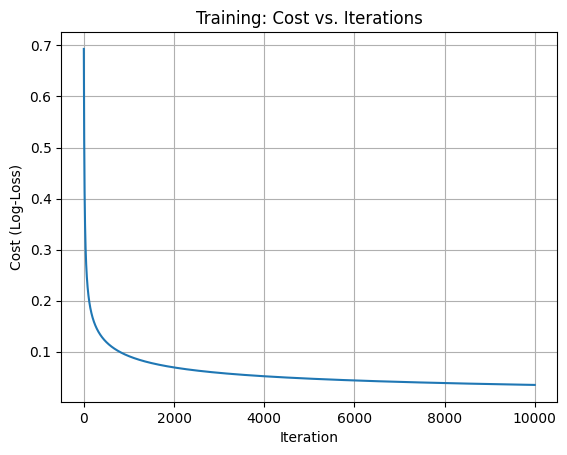

Plotting cost sensitivity for parameter indices: [8 7 3]


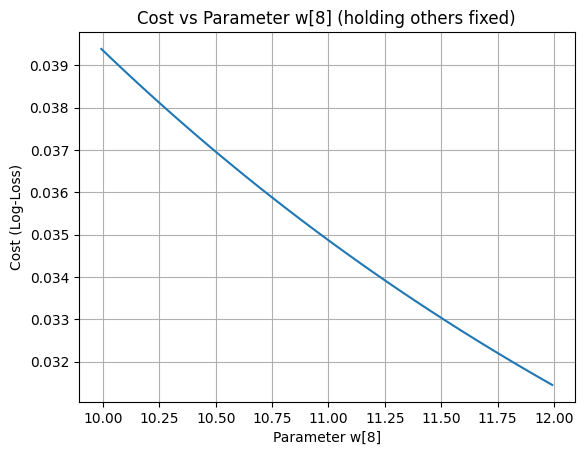

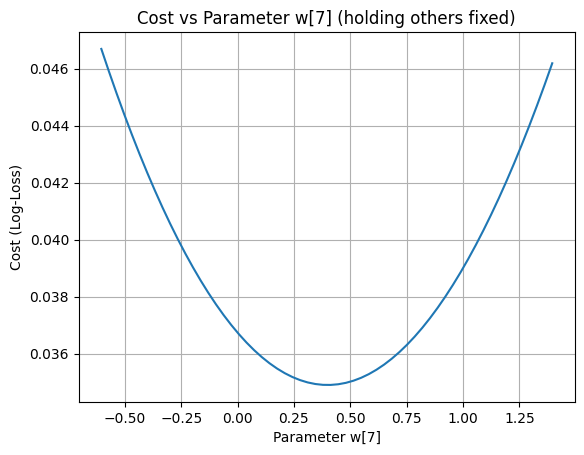

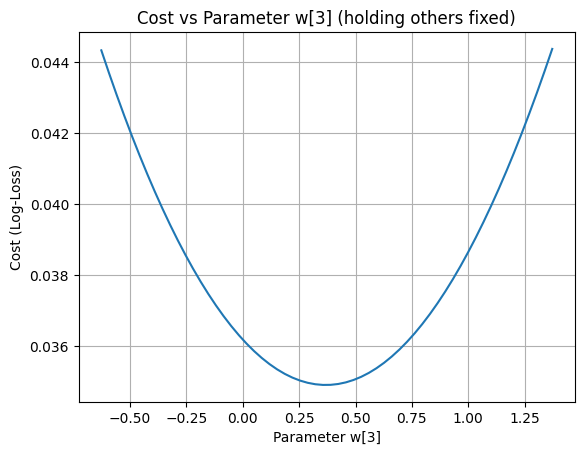

Training accuracy (for reference only): 0.9971751412429378


In [11]:
# ================================
# Logistic Regression (Adhvik Harikrishnan) — Student Performance Dataset (https://www.kaggle.com/datasets/amrmaree/student-performance-prediction)
# ================================

# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1) Load / prepare data
# --------------------------------------------------
import pandas as pd
import numpy as np

def load_data():
    df = pd.read_csv("student_performance_dataset.csv")
    
    df = df.drop(columns=['Student_ID'])
    
    pass_fail_mapping = {'Fail': 0, 'Pass': 1}
    y = df['Pass_Fail'].map(pass_fail_mapping).values
    
    categorical_cols = [
        'Gender',
        'Parental_Education_Level',
        'Internet_Access_at_Home',
        'Extracurricular_Activities'
    ]
    
    for col in categorical_cols:
        categories = sorted(df[col].unique())
        mapping = {cat: idx for idx, cat in enumerate(categories)}
        df[col] = df[col].map(mapping)
    
    X = df.drop(columns=['Pass_Fail']).values
    
    std_dev = np.std(X, axis=0)
    std_dev[std_dev == 0] = 1
    X = (X - np.mean(X, axis=0)) / std_dev
    
    return X, y

X, y = load_data()
m, n = X.shape
X = np.column_stack([np.ones(m), X])  # Add bias column (x0 = 1)
n_with_bias = X.shape[1]

# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    return sigmoid(X.dot(w))

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def gradient(X, y_true, y_prob):
    return (1 / m) * X.T.dot(y_prob - y_true)

# 3) Initialize parameters
# --------------------------------------------------
w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
learning_rate = 0.1
num_iterations = 10000
cost_history = []

# 5) Gradient Descent loop
# --------------------------------------------------
for i in range(num_iterations):
    y_prob = predict_proba(X, w)
    cost = binary_cross_entropy(y, y_prob)
    cost_history.append(cost)
    grad = gradient(X, y, y_prob)
    w -= learning_rate * grad
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term

# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()

# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    y_hat_mod = predict_proba(X, mod_w)
    return binary_cross_entropy(y, y_hat_mod)

for idx in param_indices:
    center = w[idx]
    sweep = np.linspace(center - 1.0, center + 1.0, 60)
    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))
    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()

# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    return (predict_proba(X_new, w) >= threshold).astype(int)

preds = predict_label(X, w)
accuracy = (preds == y).mean()
print("Training accuracy (for reference only):", accuracy)
